# Predicting Diamond Prices

## Phase 2: Statistical Modelling

<br>


#### Group name: Group 27 <br>

#### Name & IDs of group members:
- Lavinia Beatriz Monteiro da Silva: s3939798 
- Joy El-Hayek: s3972828 
- Nicholas Sito: s3951974 
- Cristian Fota: s3785541 
- Shaikh Naima Labiba: s3954789

## Table of Contents 

  * [Introduction](#Introduction)
    + [Phase 1 Summary](#Phase-1-Summary)
    + [Report Overview](#Report-Overview)
    + [Overview of Methodology](#Overview-of-Methodology)
  * [Statistical Modelling](#Statistical-Modelling)
    + [Full Model Overview](#Full-Model-Overview)
    + [Full Model Diagnostic Checks](#Full-Model-Diagnostic-Checks)
    + [Feature Selection](#Feature-Selection)
    + [Reduced Model Overview](#Reduced-Model-Overview)
    + [Reduced Model Diagnostic Checks](#Reduced-Model-Diagnostic-Checks)
  * [Critique & Limitations](#Critique-&-Limitations)
  * [Summary & Conclusions](#Summary-&-Conclusions)
    + [Project Summary](#Project-Summary)
    + [Summary of Findings](#Summary-of-Findings)
    + [Conclusions](#Conclusions)
  * [References](#References)

## Introduction

### Phase 1 Summary 

Through the Phase 1 of this project, we aimed to complete Data Preparation and Visualisation of the "Diamonds" dataset sourced from Kaggle, where nearly 54,000 diamonds were analysed. The Target Feature chosen for the study was the price of diamonds in US dollars, and the explanatory variables included Carat, Cut, Color, Clarity, Table, Price, Depth Percentage, Depth, Length, and Width. Presumptions such as that the dataset's rows were not associated were made, allowing us to utilise traditional predictive models such as multiple linear regression.

Within Phase 1, multiple data cleaning and preprocessing steps were taken, these steps include:

<b>1. Checking for missing values</b><br>
Upon checking, no missing values were found

<b>2. Checking for incorrect values for both numerical and categorical features</b><br>
This included checking for values that are inherently incorrect, such as negative values for prices or values that which were not listed as one of the options for categorical features. This examination indicated the existence of outliers for columns such as carat, price, width, depth, and length.

<b>3. Calculating and removing outliers</b><br>
All features mentioned above were checked for outliers and removed accordingly.

<b>4. Aggregation</b><br>
This step included encoding the categorical columns (cut, color, clarity). As all variables were ordinals, integer-encoding was completed.

<b>5. Renaming columns</b><br>
Columns that had confusing or non-descriptive names were renamed, this includes depth, x, y, and z, which were renamed to depth percentage, length, width and depth respectively. 

<b>6. Random Sampling</b><br>
As the dataset had a significant number of rows, a random sample of 500 rows was taken.

Subsequent to preprocessing steps, data exploration and visualisation was completed through a mix of univariable, two variable, and three variable plots. These plots helped explore the impact of various descriptive features on the price of diamonds. The visualisations included a range of graphs such as box plots, histograms, and scatter plots.

Through this exploration, we determined that the size of a diamond (evident through features such as length, width, depth and carat) had the most significant influence on price. Furthermore, other features such as cut and clarity also impacted price, where if diamonds of similar sizes were compared, the one with a greater score for either of the aforementioned features would have a greater price. Conversely, the clarity scores feature seemed to not have a notice impact on price. It was discovered that bigger diamonds often have lower clarity grades, however further investigation regarding this would be necessary to confirm this relationship.

### Report Overview 

In this report, we first started by making a summary of our Phase 1 report, which constituted of choosing a dataset and preparing it for modeling through data cleaning and preprocessing using methods such as checking for missing values, outliers, and encoding features.

After that, we will be modeling our cleaned dataset using multiple linear regression. To do that, we start with the full model by having a look at all its different features and running a diagnostic check on it through different graphs to check whether it meets the conditions of a regression model or not by analyzing the different graphs we get.

After running that diagnostic check, we perform feature selection, which removes all features that do not contribute to the accurate prediction of the diamonds' prices. This leaves us with a reduced model that has less features than the full model.

Then, we show an overview of the obtained reduced model, and run a diagnostic check on it, similar to the approach taken for the full model.

Finally, we critique our approach by discussing its strengths and weaknesses, then write the summary and conclusion of our whole report including both phases 1 and 2.

### Overview of Methodology

The methodology used for the statistical modelling performed is the following.

We first start with our full model. First, we need to get the formula which contains all the columns of the dataset except for the target feature which is the price of diamonds in this case. We get that formula by using certain python methods to avoid doing it manually and creating potential errors.

After creating this formula, we use the statsmodels.api to create an OLS (ordinary least squares) multiple regression model, which displays the different features of the dataset, the intercept, their slopes, p values, and many other values such as the R and Adjusted R-squared values. We show an overview of that model by showing the actual price, predicted price, and residuals, and creating some graphs.<br>
After that, we perform a diagnostic check on the full model to see whether the conditions of a multiple regression model are met by plotting scatterplots and histograms using residuals and different variables in the model, and analysing them.

Then, we perform feature selection by using the backward feature selection method that removes features that have a p value higher than 0.05 one by one and refitting the model after any feature is removed. This step gets us a reduced model with only variables that are significant to the prediction of the diamonds' prices.

After we get the reduced model, we show an overview of it and run a diagnostic check, which is the same steps we conducted for the full model.

## Statistical Modelling

### Full Model Overview

#### Importing Modules
<br>
First, let's start by importing all the models needed in this report.

In [1]:
# this includes importing the "clean" version of the diamonds dataset obtained after the preprocessing in phase 1
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None) 

%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

df = pd.read_csv('Phase2_Group27.csv')

Now, using all the variables in the dataset, we start by fitting a multiple linear regression model that predicts the price of diamonds.<br>This is the full model.<br>
Let's start by having a look at some rows in our cleaned dataset.

In [2]:
df.head()

,carat,cut,color,clarity,depth percentage,table,length,width,depth,price
0,0.35,4,5,4,61.9,54.0,4.53,4.58,2.82,923
1,1.01,2,4,4,60.0,63.0,6.46,6.48,3.88,6598
2,1.18,2,5,1,59.9,63.0,6.80,6.85,4.09,3219
3,1.00,2,4,5,58.4,63.0,6.58,6.47,3.81,6098
4,1.16,4,6,3,62.0,56.0,6.73,6.76,4.18,5805


The next step would be getting the formula that we're going to use to construct the regression model. To do that, all columns should be included since we are displaying the full model.<br>
We could manually add in each column in a formula string variable, however we are going to use a method that is shorter and faster.

First, let's rename the "depth percentage" column to "depth_percentage", otherwise it would cause an error when we create the model using the formula because of the space that exists in its name.

In [3]:
df = df.rename(columns = {'depth percentage': 'depth_percentage'})
df.sample(5, random_state=999)

,carat,cut,color,clarity,depth_percentage,table,length,width,depth,price
3581,1.00,3,5,2,58.5,59.0,6.62,6.51,3.84,3450
3035,0.33,3,1,8,62.1,58.0,4.39,4.43,2.74,694
2455,0.75,3,4,4,59.6,59.0,6.04,5.94,3.57,2835
3014,0.30,1,6,2,63.3,57.0,4.26,4.30,2.71,447
3114,0.31,4,6,3,61.7,55.0,4.37,4.41,2.71,565


In [4]:
# Creating the formula string of the full model
formula_string_indep_vars = ' + '.join(df.drop(columns='price').columns)
formula_string = 'price ~ ' + formula_string_indep_vars
print("Formula:", formula_string)

Formula: price ~ carat + cut + color + clarity + depth_percentage + table + length + width + depth


Now that we have our statistical model's formula defined in a string variable, we can create and fit an OLS model, which is called an Ordinary Least Squares model) and display its summary. 

In [5]:
model = sm.formula.ols(formula = formula_string, data = df)
model_fitted = model.fit()
print("OLS Multiple Regression Model:\n")
print(model_fitted.summary())

OLS Multiple Regression Model:

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     6309.
Date:                Fri, 21 Oct 2022   Prob (F-statistic):               0.00
Time:                        09:59:07   Log-Likelihood:                -38565.
No. Observations:                5000   AIC:                         7.715e+04
Df Residuals:                    4990   BIC:                         7.721e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercep

In [6]:
# Display the R squared and adjusted R squared values

print(f'R-squared = {model_fitted.rsquared:.3f}')
print(f'Adj. R-squared = {model_fitted.rsquared_adj:.3f}')

R-squared = 0.919
Adj. R-squared = 0.919


The full model has an adjusted R-squared value of 0.919, which means that around 92% of the variance is explained by the model.<br> Also, by looking at the p-values, we observe that the all of them are highly significant except for the depth percentage and depth which are insignificant at a 5% level.

Let's define a new data frame for actual price vs. predicted price and the residuals for the full model.<br>
This data frame will be used when plotting predicted values and the regression residuals.

In [7]:
residuals = pd.DataFrame({'actual': df['price'], 
                          'predicted': model_fitted.fittedvalues, 
                          'residual': model_fitted.resid})
residuals.head(10)

,actual,predicted,residual
0,923,894.361138,28.638862
1,6598,4843.510168,1754.489832
2,3219,5464.479751,-2245.479751
3,6098,4918.997571,1179.002429
4,5805,6061.382635,-256.382635
5,3080,2655.486469,424.513531
6,2593,2961.689112,-368.689112
7,3919,3724.259753,194.740247
8,1257,1651.494644,-394.494644
9,4382,3900.137208,481.862792


Let's plot actual price values vs. predicted values.

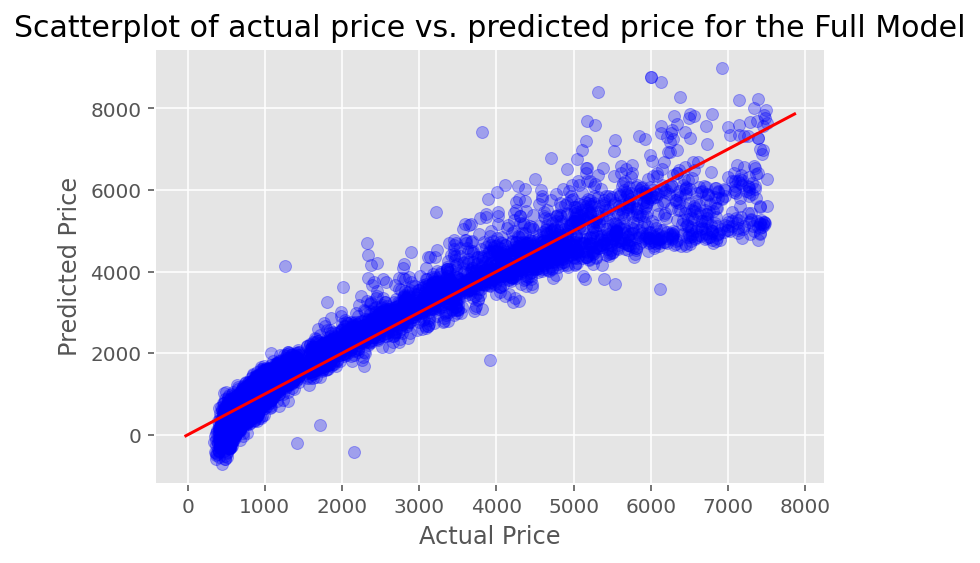

In [8]:
def plot_line(axis, slope, intercept, **kargs):
    xmin, xmax = axis.get_xlim()
    plt.plot([xmin, xmax], [xmin*slope+intercept, xmax*slope+intercept], **kargs)

# Creating scatter plot
plt.scatter(residuals['actual'], residuals['predicted'], alpha=0.3, color='blue');
plot_line(axis=plt.gca(), slope=1, intercept=0, c="red");
plt.xlabel('Actual Price');
plt.ylabel('Predicted Price');
plt.title('Scatterplot of actual price vs. predicted price for the Full Model', fontsize=15);
plt.show();

*we need to write some explanation for this scatterplot*

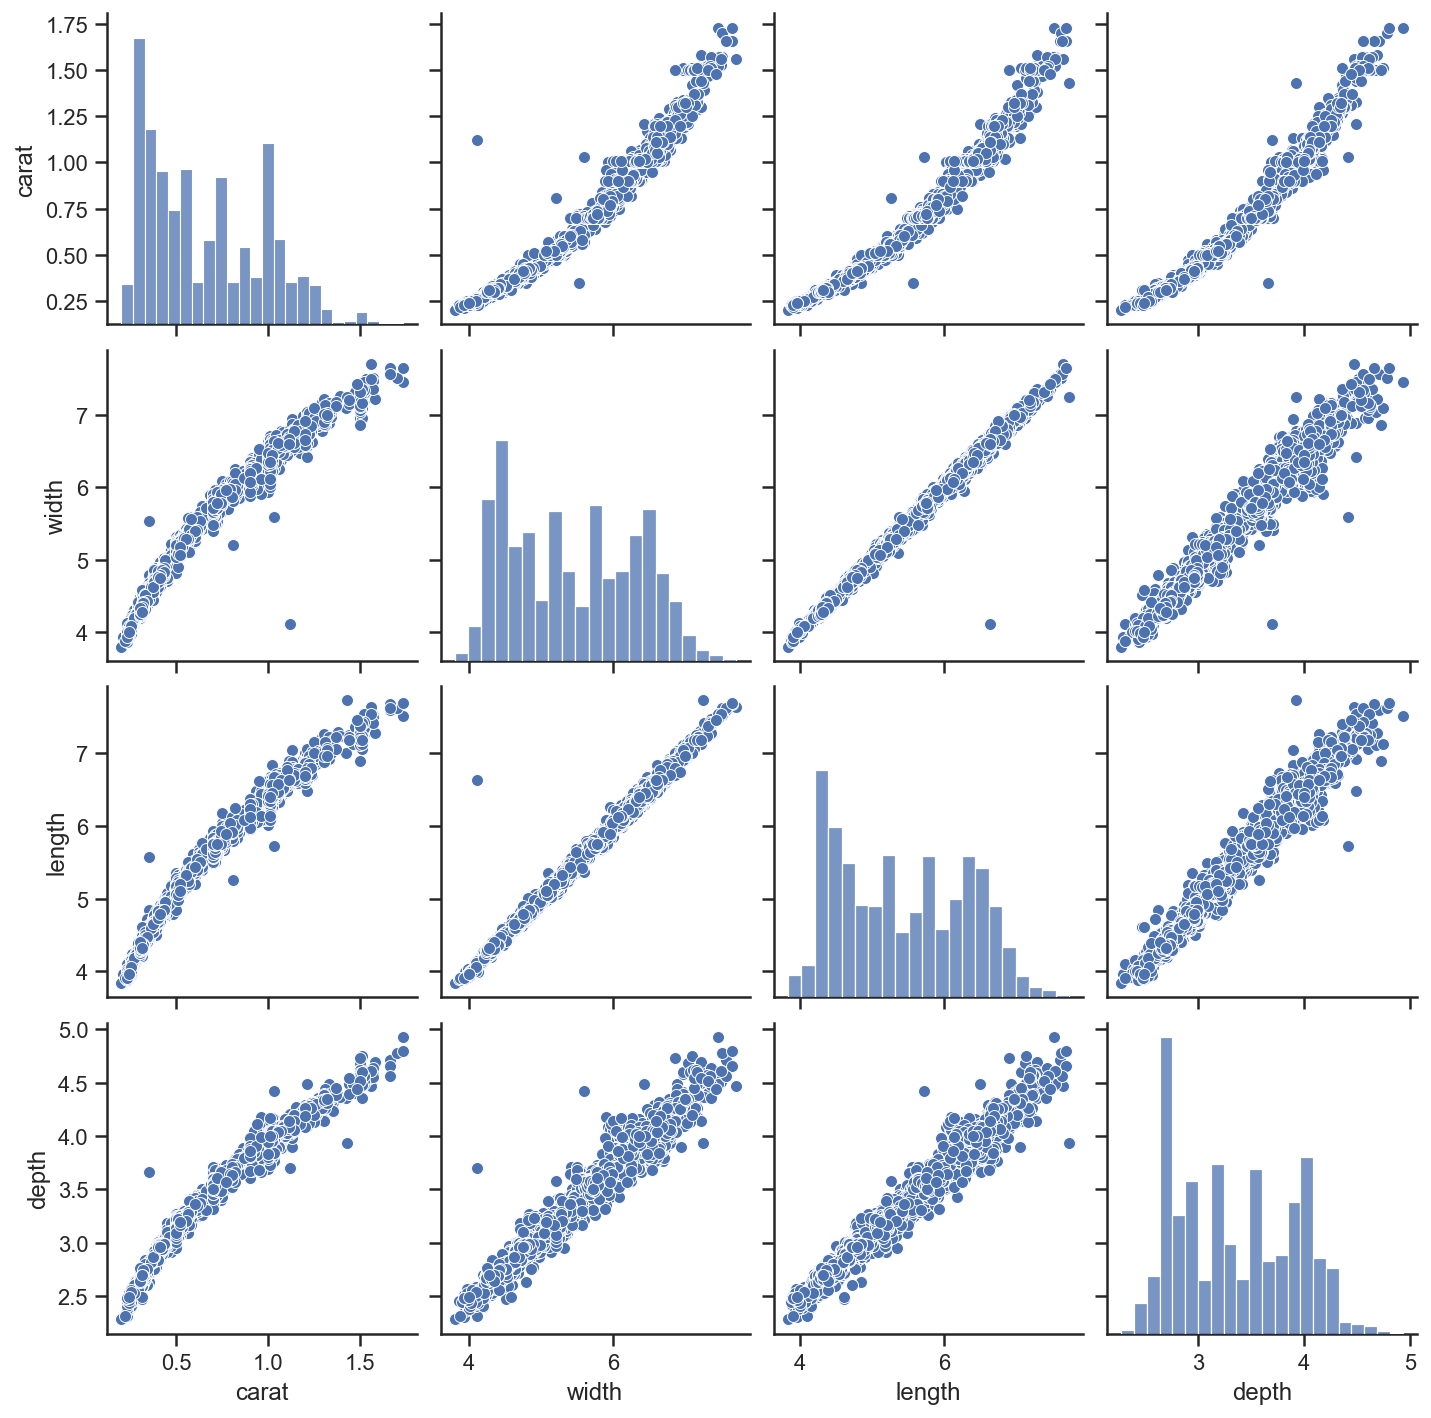

In [9]:
plt.rcParams['figure.figsize'] = (10,5)
sns.set(style="ticks", color_codes = True)

sns.pairplot(df, vars = ['carat','width','length','depth'])
plt.show();

We will now examine the full model's diagnostics.

### Full Model Diagnostic Checks

You need to check whether there are indications of violations of the regression assumptions for the full model.

We want to see whether there are any signs of regression assumptions being violated.<br>
The conditions are:<br>
1- Residuals are nearly normal.<br>
2- Residuals have nearly constant variability.<br>
3- Residuals are independent.<br>
4- Each variable is linearly related to the outcome.

<h4> Let's first get a scatter plot of residuals (as a function of predicted price).</h4>

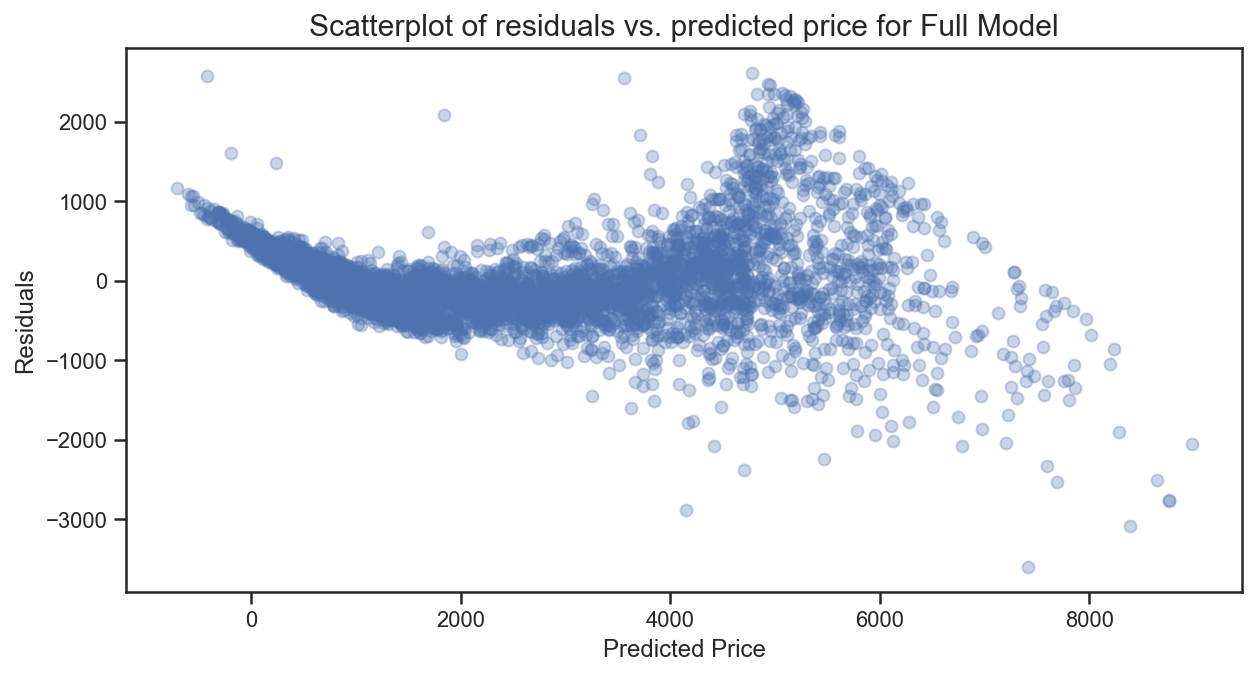

In [10]:
plt.scatter(residuals['predicted'], residuals['residual'], alpha=0.3);
plt.xlabel('Predicted Price');
plt.ylabel('Residuals')
plt.title('Scatterplot of residuals vs. predicted price for Full Model', fontsize=15)
plt.show();

As we can see in this scatterplot, the residuals are mostly centered around 0, except for the extremities where the residuals have a higher absolute value, which means that there is a higher variance for the very high or the very low prices.<br>
We can also tell that there are predicted prices values that are below zero, which is not a real possibility, but that's the case here because the model has a negative intercept value. Therefore, these values shouldn't be taken into account.<br>
For prices in the range of 0 to 4000, the residuals are around 0 which means that this range of values is accurately explained by the model.

The model fits the constant variance assumption for prices between 0 and 4000, however for higher prices there's a higher variance.

<h4> Let's now plot actual price vs. residuals. </h4>

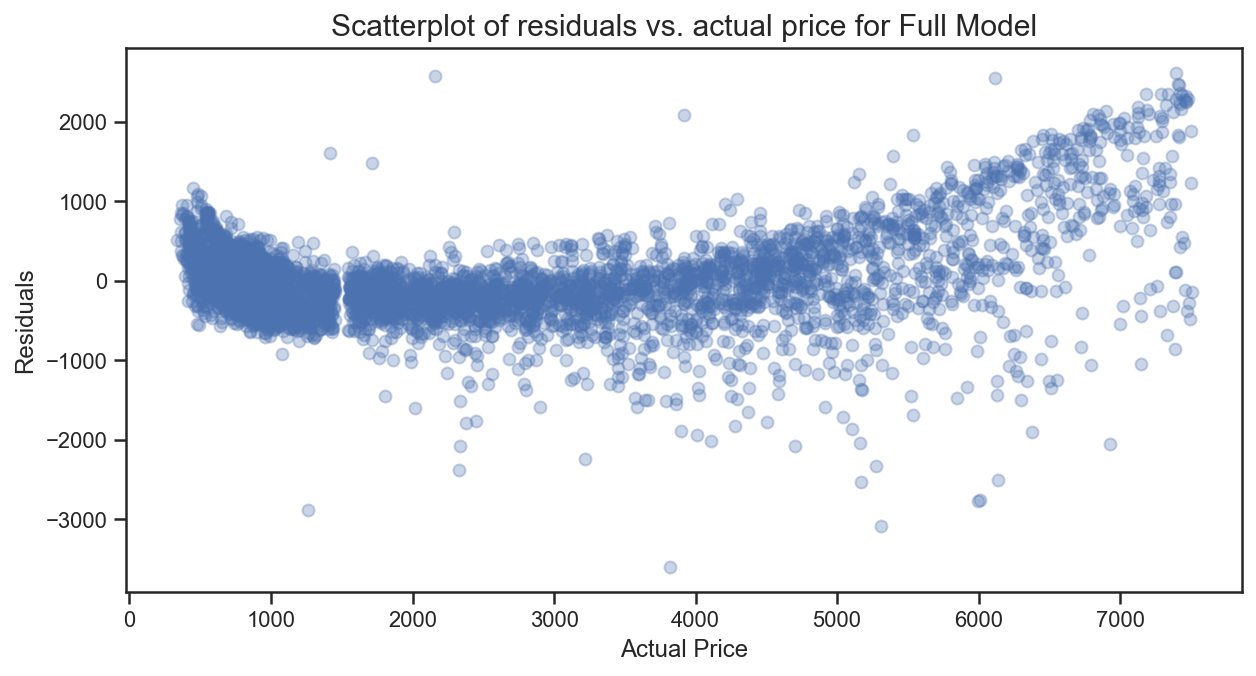

In [11]:
plt.scatter(residuals['actual'], residuals['residual'], alpha=0.3);
plt.xlabel('Actual Price');
plt.ylabel('Residuals')
plt.title('Scatterplot of residuals vs. actual price for Full Model', fontsize=15)
plt.show();

This scatterplot shows us that the model is a good fit for the diamonds that have a price between 0 and 5000 since the residuals are centered around 0. However, there is a general trend that lower prices are slightly overestimated, but the biggest variance lies within the higher prices. As the price increases, the residuals also increase which means that the model underestimates the price of diamonds for prices above 5000 where a positive linear relationship between the residuals and actual prices can be observed.

<h4> Let's overlay the histograms of actual price vs. predicted price on the same plot.</h4>

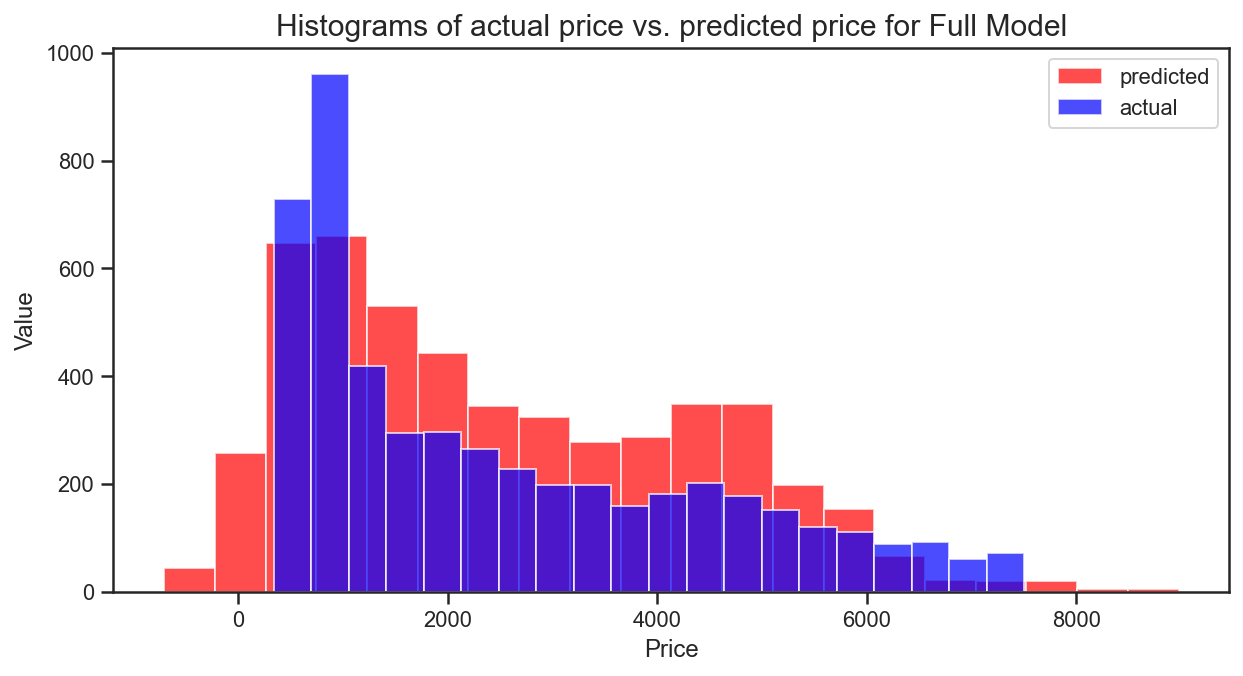

In [12]:
plt.hist(residuals['predicted'], label='predicted', bins=20, alpha=0.7, color='red');
plt.hist(residuals['actual'], label='actual', bins=20, alpha=0.7, color='blue');
plt.xlabel('Price');
plt.ylabel('Value');
plt.title('Histograms of actual price vs. predicted price for Full Model', fontsize=15);
plt.legend()
plt.show();

There's a fairly similar distribution between the actual price and the predicted price, but the predicted prices' histogram is bimodal which means that the predicted values have a less extreme distribution than the actual ones.

<h4> Let's now have look at the histogram of the residuals. </h4>

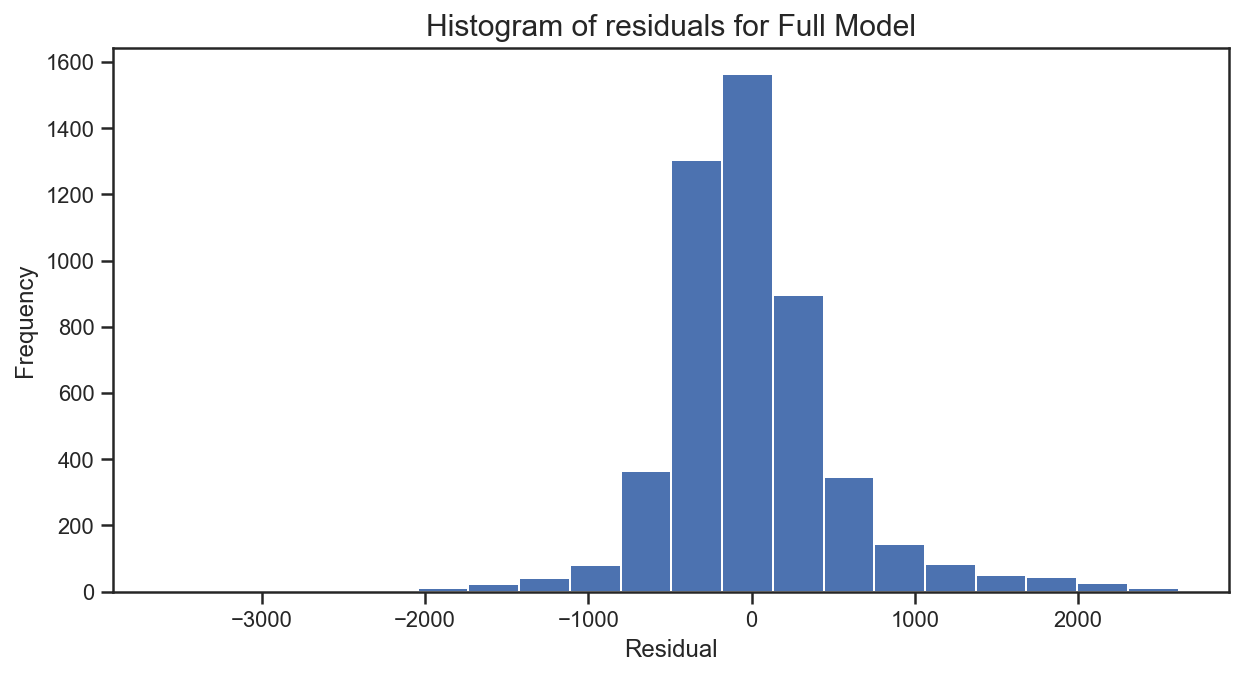

In [13]:
plt.hist(residuals['residual'], bins = 20);
plt.xlabel('Residual');
plt.ylabel('Frequency');
plt.title('Histogram of residuals for Full Model', fontsize=15);
plt.show();

The histogram of residuals looks somewhat symmetric, which shows that the residuals are normally distributed.<br>
This means that the normality assumption of residual's distribution is not significantly violated in this particular case.

<h4> Now let's check for linear relationships between the residuals and the explanatory variables by creating a scatterplot for each of them.</h4>

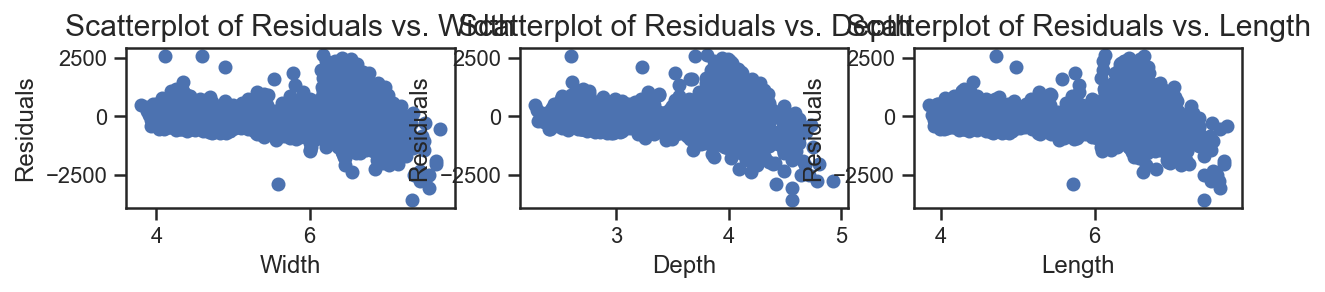

In [14]:
plt.subplot(3, 3, 1)  
plt.scatter(df['width'], residuals['residual'])
plt.xlabel('Width');
plt.ylabel('Residuals')
plt.title('Scatterplot of Residuals vs. Width', fontsize=15)

plt.subplot(3, 3, 2) 
plt.scatter(df['depth'], residuals['residual'])
plt.xlabel('Depth');
plt.ylabel('Residuals')
plt.title('Scatterplot of Residuals vs. Depth', fontsize=15)


plt.subplot(3, 3, 3)  
plt.scatter(df['length'], residuals['residual'])
plt.xlabel('Length');
plt.ylabel('Residuals')
plt.title('Scatterplot of Residuals vs. Length', fontsize=15)


plt.show();

### Feature Selection 

We now need to remove all features that do not contribute positively to our model, or don't help us conclude anything regarding how the price of diamonds varies. To do that, we will be doing backward feature selection which checks the p values of all variables, removes the ones above 0.05 one by one, and refits the model after each feature is removed.

The following section contains code taken from the sample provided from the git hub account, which is the regression case study on predicting age in census. A reference to it is in the references section of the report.

In [15]:
## create the patsy model description from formula
patsy_description = patsy.ModelDesc.from_formula(formula_string)

# initialize feature-selected fit to full model
linreg_fit = model_fitted

# do backwards elimination using p-values
p_val_cutoff = 0.05

## WARNING 1: The code below assumes that the Intercept term is present in the model.
## WARNING 2: It will work only with main effects and two-way interactions, if any.

print('\nPerforming backwards feature selection using p-values:')

while True:

    # uncomment the line below if you would like to see the regression summary
    # in each step:
    ### print(linreg_fit.summary())

    pval_series = linreg_fit.pvalues.drop(labels='Intercept')
    pval_series = pval_series.sort_values(ascending=False)
    term = pval_series.index[0]
    pval = pval_series[0]
    if (pval < p_val_cutoff):
        break
    term_components = term.split(':')
    print(f'\nRemoving term "{term}" with p-value {pval:.4}')
    if (len(term_components) == 1): ## this is a main effect term
        patsy_description.rhs_termlist.remove(patsy.Term([patsy.EvalFactor(term_components[0])]))    
    else: ## this is an interaction term
        patsy_description.rhs_termlist.remove(patsy.Term([patsy.EvalFactor(term_components[0]), 
                                                        patsy.EvalFactor(term_components[1])]))    
        
    linreg_fit = smf.ols(formula=patsy_description, data=df).fit()
    
###
## this is the clean fit after backwards elimination
model_reduced_fitted = smf.ols(formula = patsy_description, data = df).fit()
###
    
#########
print("\n***")
print(model_reduced_fitted.summary())
print("***")
print(f"Regression number of terms: {len(model_reduced_fitted.model.exog_names)}")
print(f"Regression F-distribution p-value: {model_reduced_fitted.f_pvalue:.4f}")
print(f"Regression R-squared: {model_reduced_fitted.rsquared:.4f}")
print(f"Regression Adjusted R-squared: {model_reduced_fitted.rsquared_adj:.4f}")


Performing backwards feature selection using p-values:

Removing term "depth_percentage" with p-value 0.6562

Removing term "table" with p-value 0.05751

***
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     8108.
Date:                Fri, 21 Oct 2022   Prob (F-statistic):               0.00
Time:                        09:59:11   Log-Likelihood:                -38567.
No. Observations:                5000   AIC:                         7.715e+04
Df Residuals:                    4992   BIC:                         7.720e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>

### Reduced Model Overview

Overview of your reduced model, including the variables and terms you are using in your model.

In [20]:
#R-Squared values of the reduced model
print(f'R-squared = {model_reduced_fitted.rsquared:.3f}')
print(f'Adj. R-squared = {model_reduced_fitted.rsquared_adj:.3f}')

R-squared = 0.919
Adj. R-squared = 0.919


In [17]:
reduced_residuals = pd.DataFrame({'actual': df['price'], 
                                  'predicted': model_reduced_fitted.fittedvalues, 
                                  'residual': model_reduced_fitted.resid})
reduced_residuals.head(10)

,actual,predicted,residual
0,923,878.597154,44.402846
1,6598,4865.257855,1732.742145
2,3219,5482.297752,-2263.297752
3,6098,4921.883290,1176.116710
4,5805,6056.219973,-251.219973
5,3080,2648.365867,431.634133
6,2593,2958.659092,-365.659092
7,3919,3745.813361,173.186639
8,1257,1648.906114,-391.906114
9,4382,3937.277612,444.722388


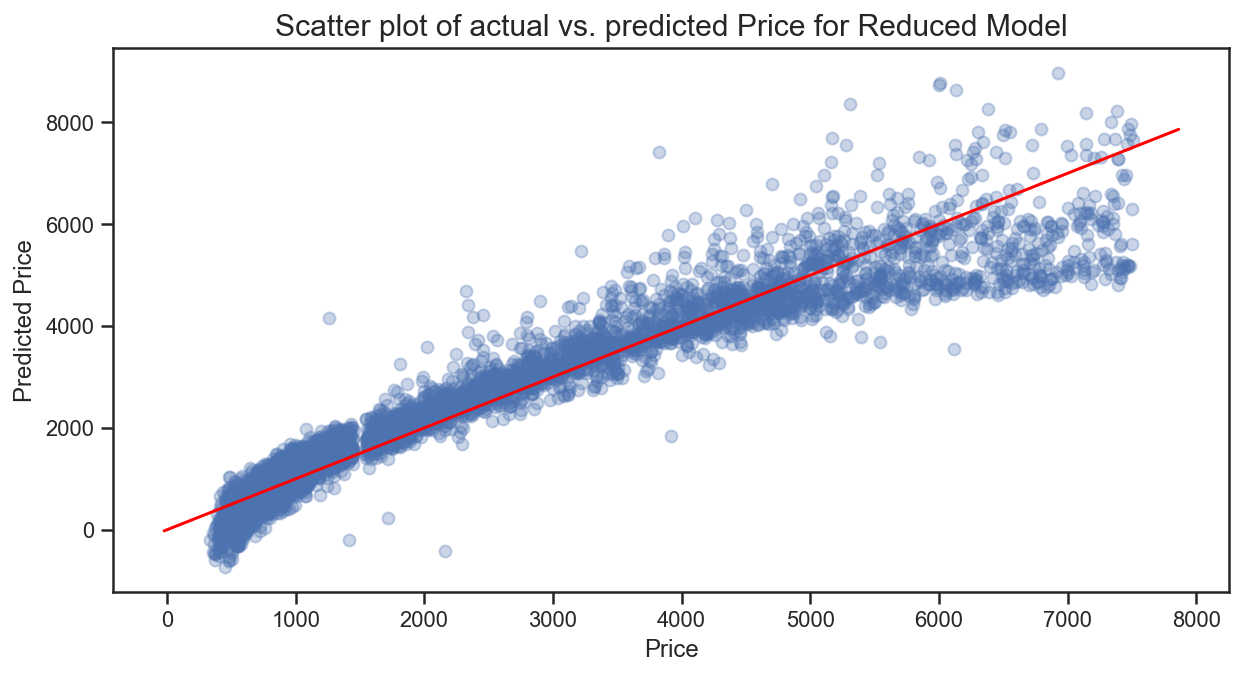

In [19]:
# get a scatter plot
plt.scatter(reduced_residuals['actual'], reduced_residuals['predicted'], alpha=0.3);
plot_line(axis=plt.gca(), slope=1, intercept=0, c="red");
plt.xlabel('Price');
plt.ylabel('Predicted Price');
plt.title('Scatter plot of actual vs. predicted Price for Reduced Model', fontsize=15);
plt.show(); 

This model has an adjusted R-squared of 0.919 which indicates that the reduced model explains roughly 92% of the discrepancy with two less variables. By observing the P-values we can say that all of them are outstnading at the 5% level. By looking at the figure above, we can say that the residuals of prices from 0 to 5000 are centered around zeros which means that this range of price is accuratly explained by the model. However, from the price of 5000 onwards we start to notice a bit of discrepancy where the model underestimates higher prices. 

### Reduced Model Diagnostic Checks

You need to check whether there are indications of violations of the regression assumptions for the reduced model.

We want to see whether there are any signs of regression assumptions being violated.<br>
The conditions are:<br>
1- Residuals are nearly normal.<br>
2- Residuals have nearly constant variability.<br>
3- Residuals are independent.<br>
4- Each variable is linearly related to the outcome.

<h4> Let's first get a scatter plot of reduced residuals (as a function of predicted price).</h4>

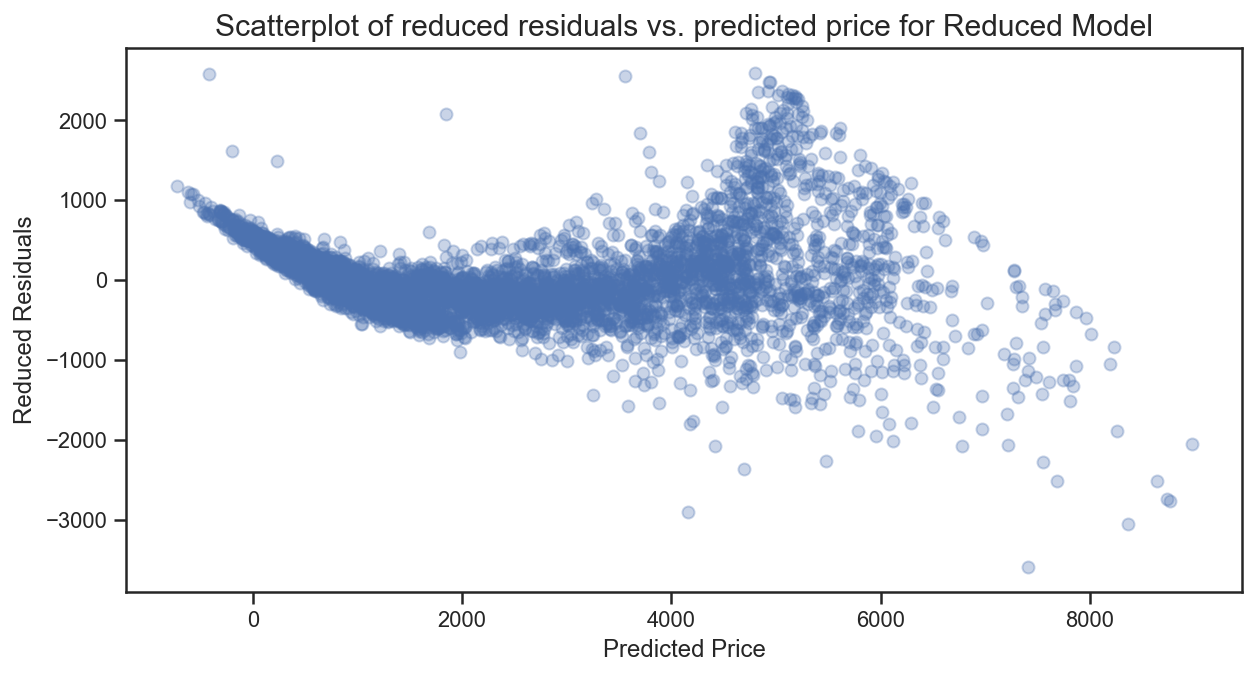

In [24]:
plt.scatter(reduced_residuals['predicted'], reduced_residuals['residual'], alpha=0.3);
plt.xlabel('Predicted Price');
plt.ylabel('Reduced Residuals')
plt.title('Scatterplot of reduced residuals vs. predicted price for Reduced Model', fontsize=15)
plt.show();

As shown in the scatterplot above, we have a similar pattern to the full model's plot. This scatterplot shows that the residuals are primarily centred around 0, with the exception of the extrema, where the residuals have a higher absolute value, indicating a bigger variance for the extremely high or extremely low values.
Additionally, because the model includes a negative intercept value, we can see that some forecasted price values are below zero, which is not a genuine possibility but is the case in this instance. As a result, these values shouldn't be considered.
The residuals are close to zero for prices between 0 and 4000, indicating that the model adequately accounts for this range of values. 

<h4> Let's now plot actual price vs. reduced residuals. </h4>

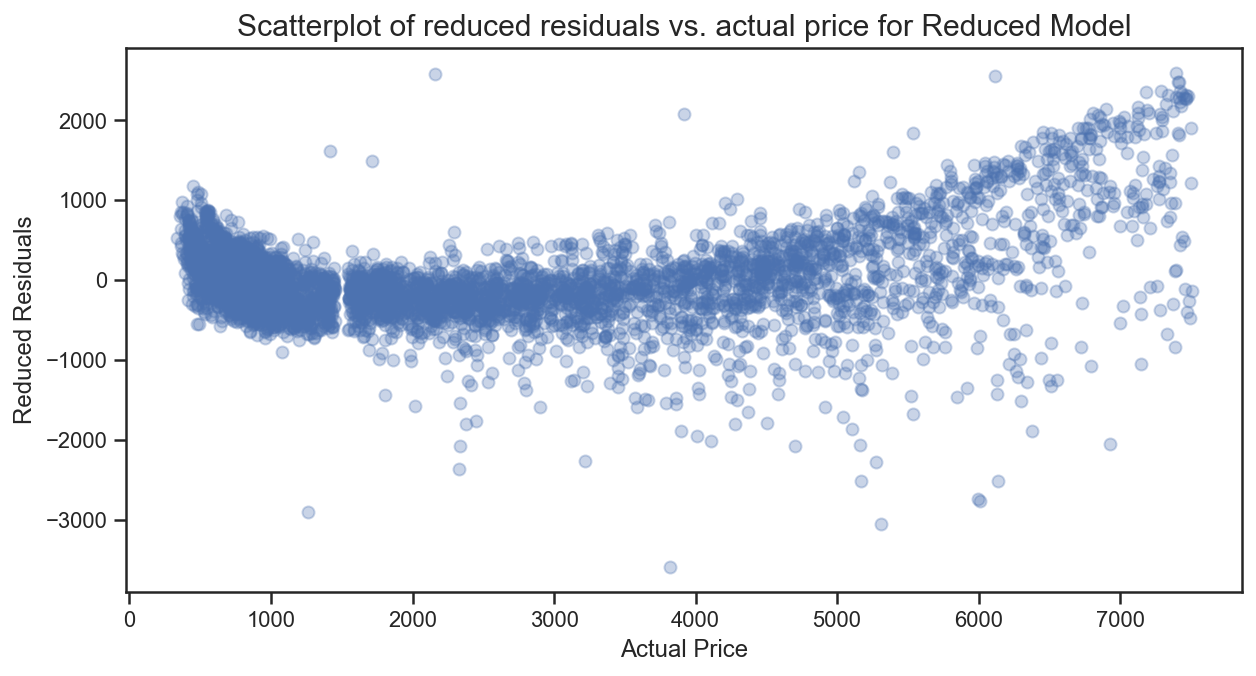

In [26]:
plt.scatter(reduced_residuals['actual'], reduced_residuals['residual'], alpha=0.3);
plt.xlabel('Actual Price');
plt.ylabel('Reduced Residuals')
plt.title('Scatterplot of reduced residuals vs. actual price for Reduced Model', fontsize=15)
plt.show();

The residuals in this scatterplot are centred around zero, indicating that the model fits well for diamonds with a price between 0 and 5000. However, it is shown that lesser prices are generally being somewhat overestimated. There is a large discrepancy as we look past the 5000 price range where the model becomes less accurate when predicting the price of diamonds. There is a positive linear link between the residuals and actual prices, because as the price rises, the residuals rise along with it.

<h4> Let's overlay the histograms of actual price vs. predicted price on the same plot.</h4>

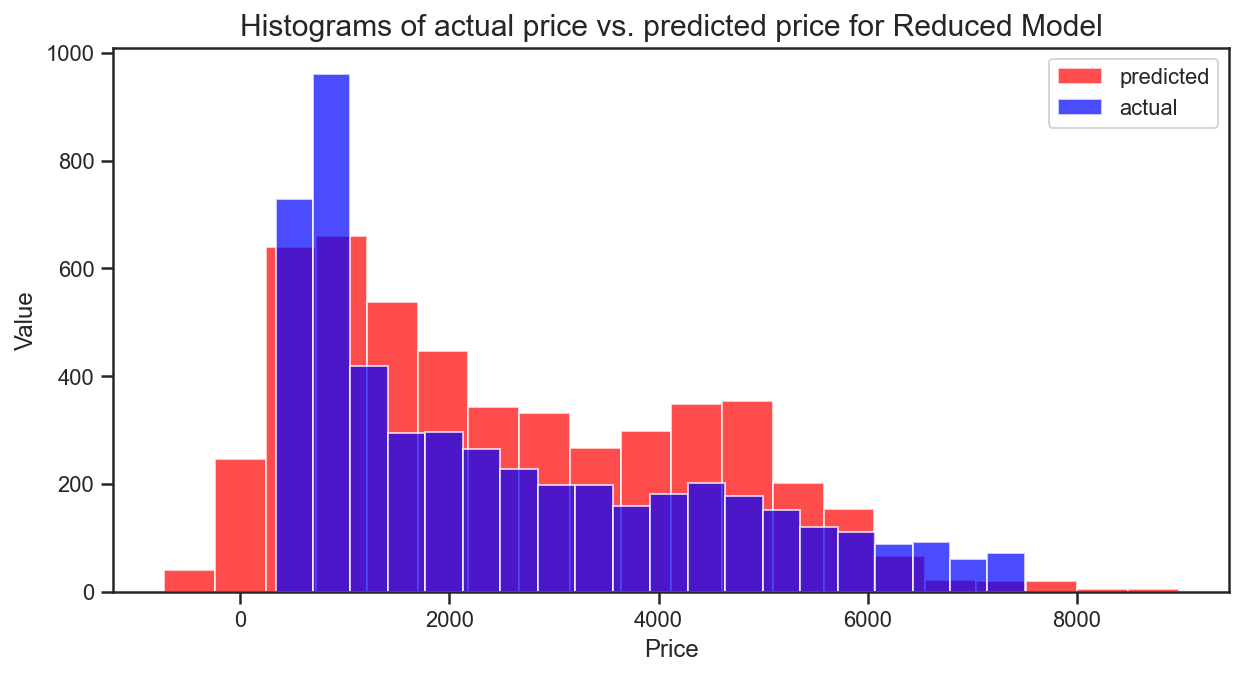

In [27]:
plt.hist(reduced_residuals['predicted'], label='predicted', bins=20, alpha=0.7, color='red');
plt.hist(reduced_residuals['actual'], label='actual', bins=20, alpha=0.7, color='blue');
plt.xlabel('Price');
plt.ylabel('Value');
plt.title('Histograms of actual price vs. predicted price for Reduced Model', fontsize=15);
plt.legend()
plt.show();

Although the actual and anticipated prices have distributions that are somewhat comparable, the predicted prices' histogram is bimodal, which suggests that the predicted values have a less skewed distribution than the actual ones. The histogram above demonstrates that below the price of 6000, prices are overestimated except for prices inbetween 0 to 1000 where it is shown that prices are underestimated.

<h4> Let's now have look at the histogram of the residuals. </h4>

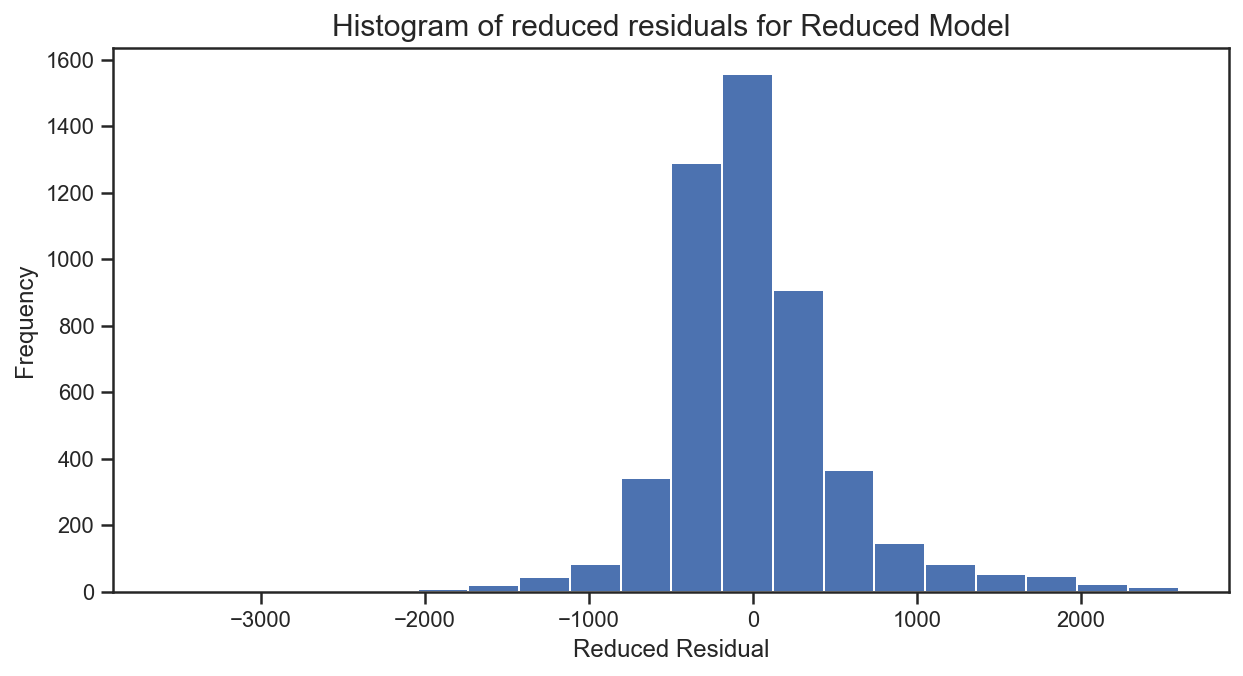

In [28]:
plt.hist(reduced_residuals['residual'], bins = 20);
plt.xlabel('Reduced Residual');
plt.ylabel('Frequency');
plt.title('Histogram of reduced residuals for Reduced Model', fontsize=15);
plt.show();

The histogram above is similar to the full model's histogram since it looks somewhat symmetric. This indicates that the reduced residuals are also normally distributed. Therefore, the normality assumption of residual's distribution is not significantly violated. 

<h4> Now let's check for linear relationships between the residuals and the explanatory variables by creating a scatterplot for each of them.</h4>

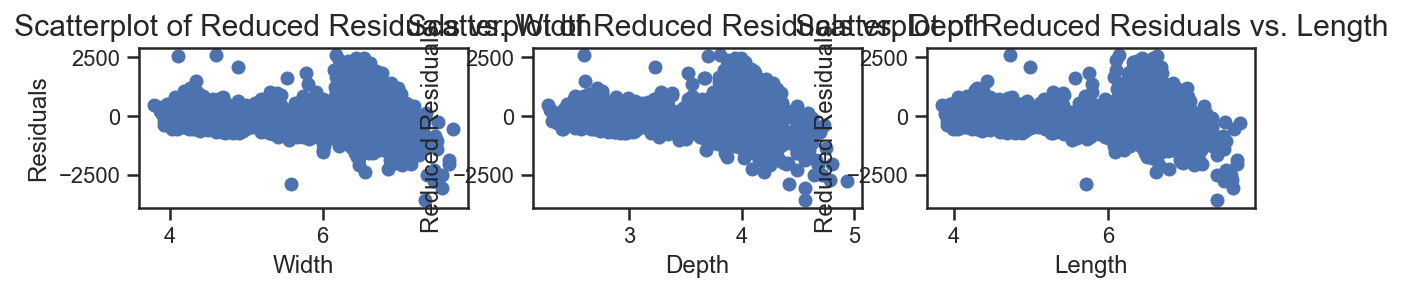

In [32]:
plt.subplot(3, 3, 1)  
plt.scatter(df['width'], reduced_residuals['residual'])
plt.xlabel('Width');
plt.ylabel('Residuals')
plt.title('Scatterplot of Reduced Residuals vs. Width', fontsize=15)


plt.subplot(3, 3, 2) 
plt.scatter(df['depth'], reduced_residuals['residual'])
plt.xlabel('Depth');
plt.ylabel('Reduced Residuals')
plt.title('Scatterplot of Reduced Residuals vs. Depth', fontsize=15)


plt.subplot(3, 3, 3)  
plt.scatter(df['length'], reduced_residuals['residual'])
plt.xlabel('Length');
plt.ylabel('Reduced Residuals')
plt.title('Scatterplot of Reduced Residuals vs. Length', fontsize=15)


plt.show();

## Critique & Limitations

Critique & Limitations of your approach: strengths and weaknesses in detail.

## Summary & Conclusions

### Project Summary

A comprehensive summary of your entire project (both Phase 1 and Phase 2). That is, what exactly did you do in your project? (Example: I first cleaned the data in such and such ways. And then I applied multiple linear regression techniques in such and such ways. etc).

### Summary of Findings

A comprehensive summary of your findings. That is, what exactly did you find about your particular problem?

### Conclusions

Your detailed conclusions as they relate to your goals and objectives.

## References


(Akman, n.d.)
Akman, D. (n.d.). Regression_case_study_predicting_age_in_census_data.Ipynb at main · akmand/stats_tutorials.